# Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor

# Loading .xls

In [3]:
who = pd.read_csv('Life_Expectancy_Data.xls')

In [4]:
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Checking size of data frame (columns + rows)

In [5]:
len(who.columns)

22

In [6]:
len(who.index)

2938

# Checking for data types

In [7]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Checking amount of NaN's

In [8]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Country,0.00
1,Year,0.00
2,Status,0.00
3,Life expectancy,0.34
4,Adult Mortality,0.34
5,infant deaths,0.00
6,Alcohol,6.60
7,percentage expenditure,0.00
8,Hepatitis B,18.82
9,Measles,0.00


# Replacing NaN with median

In [9]:
who.fillna(who.median(), inplace=True)

/var/folders/z7/h39z8zd55hb3q_stjqd0sqgm0000gn/T/ipykernel_4278/2090037703.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  who.fillna(who.median(), inplace=True)


In [10]:
nulls_df = pd.DataFrame(round(who.isna().sum()/len(who),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Country,0.0
1,Year,0.0
2,Status,0.0
3,Life expectancy,0.0
4,Adult Mortality,0.0
5,infant deaths,0.0
6,Alcohol,0.0
7,percentage expenditure,0.0
8,Hepatitis B,0.0
9,Measles,0.0


# Dropping duplicates

In [11]:
who.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Checking for column uniform names

In [12]:
who.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Standardizing column names

In [13]:
who.rename(columns={'Life expectancy ' : 'life expectancy'}, inplace=True)

In [14]:
who.rename(columns={'Measles '  : 'measles'}, inplace=True)

In [15]:
who.rename(columns={' BMI ' : 'bmi'}, inplace=True)

In [16]:
who.rename(columns={'under-five deaths ' : 'under-five deaths'}, inplace=True)

In [17]:
who.rename(columns={'Diphtheria ' : 'diphtheria'}, inplace=True)

In [18]:
who.rename(columns={' HIV/AIDS' : 'hiv/aids'}, inplace=True)

In [19]:
who.rename(columns={' thinness  1-19 years' : 'thinness 1-19 years'}, inplace=True)

In [20]:
who.rename(columns={' thinness 5-9 years' : 'thinness 5-9 years'}, inplace=True)

In [21]:
who.columns= who.columns.str.lower()

In [22]:
who.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

# Standardizing country names

In [23]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [24]:
who.replace('Brunei Darussalam', 'Brunei', inplace=True)

In [25]:
who.replace('Bolivia (Plurinational State of)', 'Bolivia', inplace=True)

In [26]:
who.replace('Cabo Verde', 'Cape Verde', inplace=True)

In [27]:
who.replace("Democratic People's Republic of Korea", "North Korea", inplace=True)

In [28]:
who.replace("Democratic Republic of the Congo", "Congo", inplace=True)

In [29]:
who.replace('Iran (Islamic Republic of)', 'Iran', inplace=True)

In [30]:
who.replace("Lao People's Democratic Republic", "Laos", inplace=True)

In [31]:
who.replace("Micronesia (Federated States of)", "Micronesia", inplace=True)

In [32]:
who.replace("Republic of Korea", "South Republic of Korea", inplace=True)

In [33]:
who.replace("Republic of Moldova", "Moldova", inplace=True)

In [34]:
who.replace("Russian Federation", "Russia", inplace=True)

In [35]:
who.replace("Syrian Arab Republic", "Syria", inplace=True)

In [36]:
who.replace("The former Yugoslav republic of Macedonia", "Macedonia", inplace=True)

In [37]:
who.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom", inplace=True)

In [38]:
who.replace("United Republic of Tanzania", "Tanzania", inplace=True)

In [39]:
who.replace("United States of America", "America", inplace=True)

In [40]:
who.replace("America", "United States", inplace=True)

In [41]:
who.replace("Venezuela (Bolivarian Republic of)", "Venezuela", inplace=True)

In [42]:
who.replace("Viet Nam", "Vietnam", inplace=True)

In [43]:
who['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire",
       'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'North Korea', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
  

# Checking skewness of dataframe

In [44]:
who.skew(axis = 0, skipna = False)

/var/folders/z7/h39z8zd55hb3q_stjqd0sqgm0000gn/T/ipykernel_4278/1374744912.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  who.skew(axis = 0, skipna = False)


year                               -0.006409
life expectancy                    -0.642391
adult mortality                     1.177899
infant deaths                       9.786963
alcohol                             0.649578
percentage expenditure              4.652051
hepatitis b                        -2.281697
measles                             9.441332
bmi                                -0.229157
under-five deaths                   9.495065
polio                              -2.108909
total expenditure                   0.661108
diphtheria                         -2.083566
hiv/aids                            5.396112
gdp                                 3.543756
population                         17.972837
thinness 1-19 years                 1.729496
thinness 5-9 years                  1.795694
income composition of resources    -1.212526
schooling                          -0.635052
dtype: float64

# Building correlation heatmap

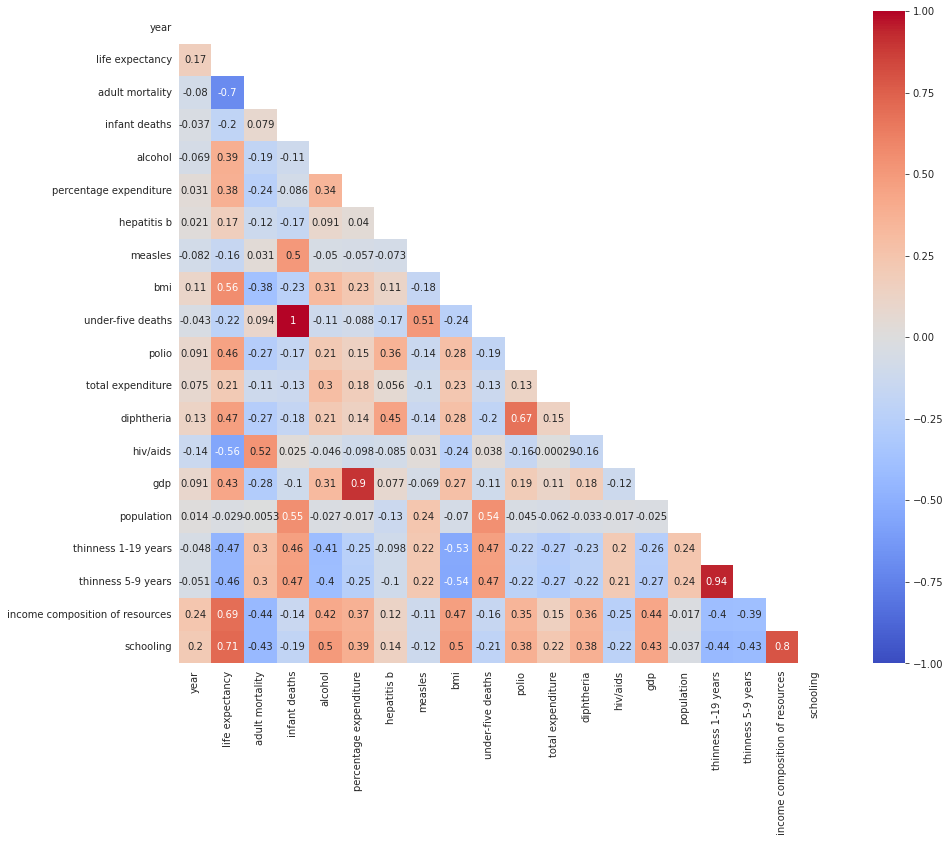

In [45]:
corr = who.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)





# Identifying highly correlated columns

In [46]:
corr_matrix=who.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.80)]



['under-five deaths', 'gdp', 'thinness 5-9 years']

# Dropping highly correlated columns

In [47]:
who.drop(['under-five deaths', 'gdp', 'thinness 5-9 years'],axis=1,inplace=True)

# Dividing categoricals/numericals

In [48]:
who_categoricals = pd.concat([who['country'], who['status']], axis = 1)

In [49]:
who_categoricals

,country,status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [50]:
who_numericals = who._get_numeric_data()

In [51]:
who_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   life expectancy                  2938 non-null   float64
 2   adult mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   hepatitis b                      2938 non-null   float64
 7   measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   polio                            2938 non-null   float64
 10  total expenditure                2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv/aids            

# Defining X1, y1 (Linear regression, w/o Hot Coding)

In [52]:
X1 = who_numericals

In [53]:
X1 = X1.drop(['life expectancy'], axis=1)

In [54]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   adult mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   hepatitis b                      2938 non-null   float64
 6   measles                          2938 non-null   int64  
 7   bmi                              2938 non-null   float64
 8   polio                            2938 non-null   float64
 9   total expenditure                2938 non-null   float64
 10  diphtheria                       2938 non-null   float64
 11  hiv/aids                         2938 non-null   float64
 12  population          

In [55]:
y1 = who_numericals['life expectancy']

In [56]:
y1

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: life expectancy, Length: 2938, dtype: float64

# Data splitting X1, y1

In [57]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test  = pd.DataFrame(X1_test, columns=X1.columns)

# Standardizing Data X1, y1

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'adult mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'polio'}>,
        <AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'diphtheria'}>,
        <AxesSubplot:title={'center':'hiv/aids'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'income composition of resources'}>,
        <AxesSubplot:title={'center':'schooling'}>]], dtype=object)

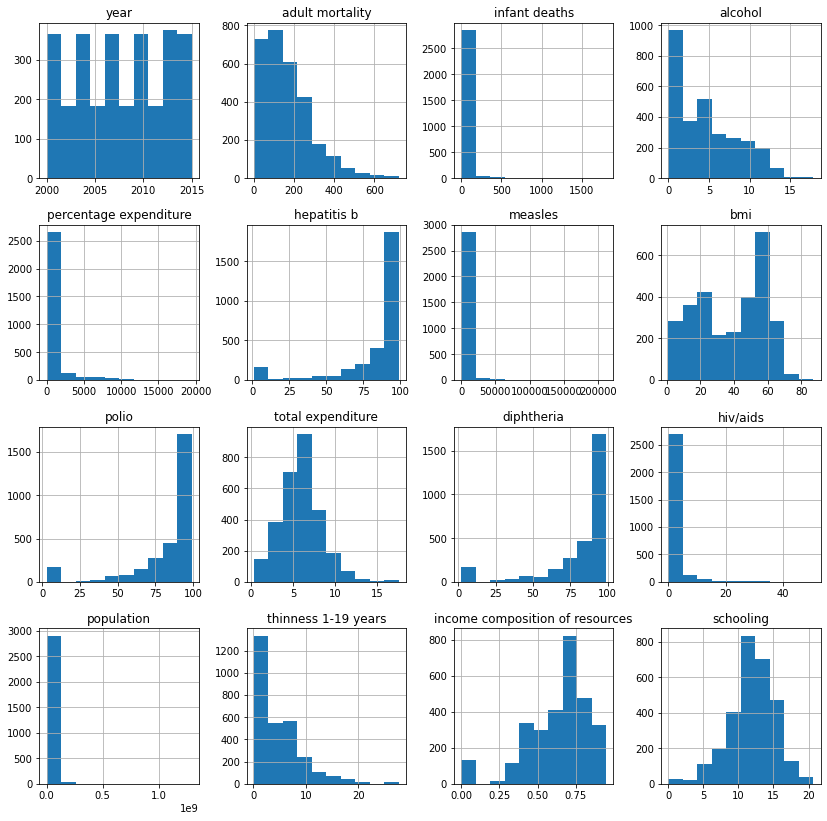

In [58]:
 X1.hist(figsize=(14,14))

In [59]:
std_scaler=StandardScaler().fit(X1_train)   

X1_train_scaled=std_scaler.transform(X1_train)



In [60]:
X1_test_scaled=std_scaler.transform(X1_test)

# Fitting model (Linear Regression, X1, y1)



In [61]:
model1=LinearRegression()    
model1.fit(X1_train_scaled, y1_train)

LinearRegression()

In [62]:
model1.coef_



array([-0.0425521 , -2.71066366, -0.09631463,  0.2824431 ,  0.63299032,
       -0.46168278, -0.44263805,  0.83338256,  0.73525898,  0.13044664,
        1.11442222, -2.47720222,  0.1004004 , -0.3447334 ,  1.49451976,
        2.19397433])

In [63]:
model1.intercept_

69.2867659574468

# Making prediction (X1, y1)

In [64]:
y1_pred=model1.predict(X1_test_scaled)   

y1_pred_train=model1.predict(X1_train_scaled)

# Evaluating model performance (X1, y1)

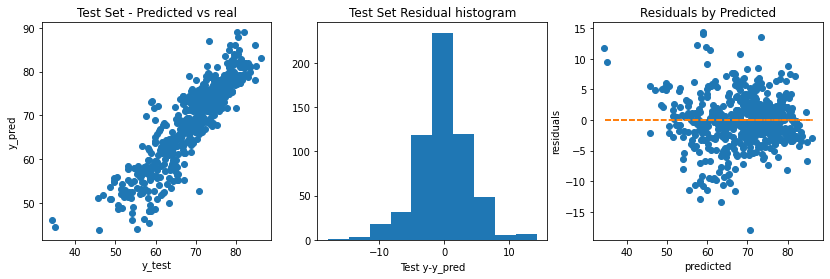

In [65]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y1_pred, y1_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y1_test - y1_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y1_pred,y1_test - y1_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y1_pred)),linestyle='dashed')

# Error metrics (X1, y1)

In [66]:
print(mse(y1_test,y1_pred))
print(mae(y1_test,y1_pred))

16.521604785204133
2.9599688273422817


In [67]:
R2_1=r2_score(y1_test,y1_pred)
R2_1

0.8093676353600016

# Cross validation (X1, y1)

In [68]:
scores1=cross_val_score(model1, X1_train, y1_train, cv = 5)
scores1

array([0.80963666, 0.8243756 , 0.7787869 , 0.78071359, 0.80624046])

In [69]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.80 accuracy with a standard deviation of 0.02


# Hot Coding coding categoricals

In [70]:
who_categoricals['status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [71]:
len(who_categoricals['status'].unique())

2

In [72]:
hc_who_categoricals = pd.get_dummies(who_categoricals[['status']], drop_first=True)
hc_who_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   status_Developing  2938 non-null   uint8
dtypes: uint8(1)
memory usage: 3.0 KB


In [73]:
hc_who_categoricals['status_Developing'].unique()

array([1, 0], dtype=uint8)

# Defining X2, y2 (Linear regression, w/ Hot Coding)

In [74]:
X2 = who_numericals

In [75]:
X2

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,12777511.0,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,12633897.0,9.8,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,125525.0,1.2,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,12366165.0,1.6,0.427,9.8


In [76]:
X2 = pd.concat([X2, hc_who_categoricals], axis=1)

In [77]:
X2.columns

Index(['year', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'population',
       'thinness 1-19 years', 'income composition of resources', 'schooling',
       'status_Developing'],
      dtype='object')

In [78]:
X2.drop(['life expectancy'], axis=1, inplace=True) 

In [79]:
X2

,year,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources,schooling,status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,12777511.0,9.4,0.407,9.2,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,12633897.0,9.8,0.418,9.5,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,125525.0,1.2,0.427,10.0,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,12366165.0,1.6,0.427,9.8,1


In [80]:
y2 = who['life expectancy']

# Data splitting (X2, y2)

In [81]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

X2_train = pd.DataFrame(X2_train, columns=X2.columns)
X2_test  = pd.DataFrame(X2_test, columns=X2.columns)

# Standardizing Data (X2, y2)

In [82]:
std_scaler=StandardScaler().fit(X2_train)   

X2_train_scaled=std_scaler.transform(X2_train)



In [83]:
X2_test_scaled=std_scaler.transform(X2_test)

# Fitting model (Linear Regression, X2, y2)



In [84]:
model2=LinearRegression()    
model2.fit(X2_train_scaled, y2_train)

LinearRegression()

# Making prediction (X2, y2)

In [85]:
y2_pred=model2.predict(X2_test_scaled)   

y2_pred_train=model2.predict(X2_train_scaled)

# Evaluating model performance (X2, y2)

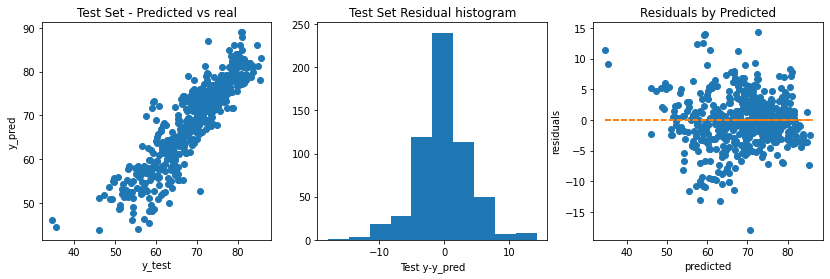

In [86]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y2_pred, y2_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y2_test - y2_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y2_pred,y2_test - y2_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y2_pred)),linestyle='dashed')

# Error metrics (X2, y2)

In [87]:
print(mse(y2_test,y2_pred))
print(mae(y2_test,y2_pred))

16.422575702188926
2.958726287564941


In [88]:
R2_2=r2_score(y2_test,y2_pred)
R2_2

0.8105102694145473

# Cross validation (X2, y2)

In [89]:
scores2=cross_val_score(model2, X2_train, y2_train, cv = 5)
scores2

array([0.81225427, 0.82636868, 0.78193953, 0.78345571, 0.80762642])

In [90]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.80 accuracy with a standard deviation of 0.02


# Defining X3, y3 (Feature Selection)

In [91]:
X3 = X2

In [92]:
y3 = y2

# Data splitting (X3, y3)

In [93]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

X3_train = pd.DataFrame(X3_train, columns=X3.columns)
X3_test  = pd.DataFrame(X3_test, columns=X3.columns)

# Recursive Feature Elimination (X3, y3)

In [94]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X3_train, y3_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X3_train.iloc[:,kept_features].columns)

X3_train_RFE = selector.transform(X3_train)
X3_test_RFE  = selector.transform(X3_test)

X3_train_RFE = pd.DataFrame(X3_train_RFE, columns=kept_features)
X3_test_RFE  = pd.DataFrame(X3_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X3_train_RFE)

Final selected features: 


,year,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources,schooling,status_Developing
0,2007.0,126.0,0.0,5.28,345.463714,96.0,0.0,25.5,98.0,4.30,98.0,0.6,486438.0,8.1,0.602,11.9,1.0
1,2001.0,152.0,0.0,3.81,150.743486,92.0,0.0,22.1,91.0,5.19,9.0,0.8,443716.0,9.4,0.562,11.0,1.0
2,2011.0,143.0,0.0,10.43,0.000000,99.0,0.0,44.5,99.0,7.58,99.0,0.1,1386542.0,4.3,0.733,12.9,1.0
3,2013.0,13.0,3.0,1.29,594.645310,98.0,16.0,59.3,98.0,7.26,98.0,0.1,1114558.0,6.4,0.720,14.7,1.0
4,2002.0,95.0,0.0,0.13,941.703687,99.0,0.0,28.0,99.0,3.40,94.0,0.1,1386542.0,6.7,0.820,13.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2011.0,59.0,0.0,6.91,3601.287457,82.0,3.0,68.0,96.0,9.60,96.0,0.1,416268.0,0.8,0.826,14.8,0.0
2346,2010.0,287.0,4.0,3.21,53.307827,83.0,26.0,23.1,82.0,6.70,83.0,5.9,155588.0,8.0,0.405,8.9,1.0
2347,2007.0,266.0,17.0,6.08,56.778587,92.0,0.0,4.7,62.0,5.56,63.0,2.7,9556889.0,4.2,0.458,8.4,1.0
2348,2003.0,72.0,2.0,9.30,3519.258515,95.0,10982.0,57.0,97.0,8.17,96.0,0.1,5731323.0,0.5,0.841,15.4,0.0


# Standardizing Data (X3, y3)

In [95]:
std_scaler=StandardScaler().fit(X3_train_RFE)   

X3_train_scaled=std_scaler.transform(X3_train_RFE)


In [96]:
X3_test_scaled=std_scaler.transform(X3_test_RFE)

# Fitting model (Linear Regression, X3, y3)

In [97]:
model3=LinearRegression()    
model3.fit(X3_train_scaled, y3_train)

LinearRegression()

# Making prediction (X3, y3)

In [98]:
y3_pred=model3.predict(X3_test_scaled)   

y3_pred_train=model2.predict(X3_train_scaled)

# Evaluating model performance (X3, y3)

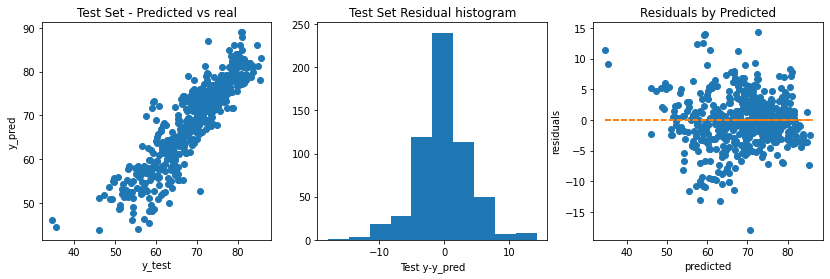

In [99]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y3_pred, y3_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y3_test - y3_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y3_pred,y3_test - y3_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y2_pred)),linestyle='dashed')

# Error metrics (X3, y3)

In [100]:
print(mse(y3_test,y3_pred))
print(mae(y3_test,y3_pred))

16.422575702188926
2.958726287564941


In [101]:
R2_3=r2_score(y3_test,y3_pred)
R2_3

0.8105102694145473

# Cross validation (X3, y3)

In [102]:
scores3=cross_val_score(model3, X3_train, y3_train, cv = 5)
scores3

array([0.81225427, 0.82636868, 0.78193953, 0.78345571, 0.80762642])

In [103]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

0.80 accuracy with a standard deviation of 0.02


# Defining X4, y4 (KNN Regression)

In [104]:
X4 = X3

In [105]:
y4 = y3

# Data splitting (X4, y4)

In [106]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=42)

X4_train = pd.DataFrame(X4_train, columns=X4.columns)
X4_test  = pd.DataFrame(X4_test, columns=X4.columns)

# Recursive Feature Elimination (X3, y3)

In [107]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X4_train, y4_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X4_train.iloc[:,kept_features].columns)

X4_train_RFE = selector.transform(X4_train)
X4_test_RFE  = selector.transform(X4_test)

X4_train_RFE = pd.DataFrame(X4_train_RFE, columns=kept_features)
X4_test_RFE  = pd.DataFrame(X4_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X4_train_RFE)

Final selected features: 


,year,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv/aids,population,thinness 1-19 years,income composition of resources,schooling,status_Developing
0,2007.0,126.0,0.0,5.28,345.463714,96.0,0.0,25.5,98.0,4.30,98.0,0.6,486438.0,8.1,0.602,11.9,1.0
1,2001.0,152.0,0.0,3.81,150.743486,92.0,0.0,22.1,91.0,5.19,9.0,0.8,443716.0,9.4,0.562,11.0,1.0
2,2011.0,143.0,0.0,10.43,0.000000,99.0,0.0,44.5,99.0,7.58,99.0,0.1,1386542.0,4.3,0.733,12.9,1.0
3,2013.0,13.0,3.0,1.29,594.645310,98.0,16.0,59.3,98.0,7.26,98.0,0.1,1114558.0,6.4,0.720,14.7,1.0
4,2002.0,95.0,0.0,0.13,941.703687,99.0,0.0,28.0,99.0,3.40,94.0,0.1,1386542.0,6.7,0.820,13.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,2011.0,59.0,0.0,6.91,3601.287457,82.0,3.0,68.0,96.0,9.60,96.0,0.1,416268.0,0.8,0.826,14.8,0.0
2346,2010.0,287.0,4.0,3.21,53.307827,83.0,26.0,23.1,82.0,6.70,83.0,5.9,155588.0,8.0,0.405,8.9,1.0
2347,2007.0,266.0,17.0,6.08,56.778587,92.0,0.0,4.7,62.0,5.56,63.0,2.7,9556889.0,4.2,0.458,8.4,1.0
2348,2003.0,72.0,2.0,9.30,3519.258515,95.0,10982.0,57.0,97.0,8.17,96.0,0.1,5731323.0,0.5,0.841,15.4,0.0


# Standardizing Data (X4, y4)

In [108]:
std_scaler=StandardScaler().fit(X4_train_RFE)   

X4_train_scaled=std_scaler.transform(X4_train_RFE)


In [109]:
X4_test_scaled=std_scaler.transform(X4_test_RFE)

# Fitting model (KNN Regression, X4, y4)

In [110]:
neigh = KNeighborsRegressor(n_neighbors=2)

In [111]:
neigh.fit(X4_train_scaled, y4_train)

KNeighborsRegressor(n_neighbors=2)

# Making prediction (X4, y4)

In [1]:
y4_pred_train = neigh.predict(X4_train_scaled)
y4_pred_test  = neigh.predict(X4_test_scaled)

NameError: name 'neigh' is not defined